# Introduction to Data Analysis with Python II


<img src="https://www.python.org/static/img/python-logo.png" alt="yogen" style="width: 200px; float: right;"/>
<br>
<br>
<br>
<img src="../assets/yogen-logo.png" alt="yogen" style="width: 200px; float: right;"/>

## Data Wrangling: Clean, Transform, Merge, Reshape

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

## Combining and merging data sets

### Database-style DataFrame merges

In [2]:
left = pd.DataFrame({'data1' : np.random.randint(100, 200, 8), 'key' : list('bacbaacb')})
right = pd.DataFrame({'data2' : np.random.randint(10, 99, 7), 'key' : list('acaacdd')})
right

,data2,key
0,12,a
1,59,c
2,23,a
3,38,a
4,98,c
5,82,d
6,90,d


In [3]:
left.merge(right)

,data1,key,data2
0,111,a,12
1,111,a,23
2,111,a,38
3,100,a,12
4,100,a,23
5,100,a,38
6,123,a,12
7,123,a,23
8,123,a,38
9,111,c,59


By default, .merge() performs an [inner join](https://www.w3schools.com/sql/sql_join.asp) between the DataFrames, using the common columns as keys.

In [4]:
left.merge(right, how='left')

,data1,key,data2
0,120,b,NaN
1,111,a,12.0
2,111,a,23.0
3,111,a,38.0
4,111,c,59.0
5,111,c,98.0
6,128,b,NaN
7,100,a,12.0
8,100,a,23.0
9,100,a,38.0


In [5]:
left.merge(right, how='outer')

,data1,key,data2
0,120.0,b,NaN
1,128.0,b,NaN
2,194.0,b,NaN
3,111.0,a,12.0
4,111.0,a,23.0
5,111.0,a,38.0
6,100.0,a,12.0
7,100.0,a,23.0
8,100.0,a,38.0
9,123.0,a,12.0


That means that it returns the cartesian product of the elements with common keys: if there are duplicates, it will return all the possible combinations:

If the columns to join on don't have the same name, or we want to join on the index of the DataFrames, we'll need to specify that.

In [6]:
right.columns = ['a', 'b']
left.merge(right, left_on=['key'], right_on=['b'])

,data1,key,a,b
0,111,a,12,a
1,111,a,23,a
2,111,a,38,a
3,100,a,12,a
4,100,a,23,a
5,100,a,38,a
6,123,a,12,a
7,123,a,23,a
8,123,a,38,a
9,111,c,59,c


If there are two columns with the same name that we do not join on, both will get transferred to the resulting DataFrame with a suffix. We can customize these suffixes.

In [7]:
right.columns = ['data1', 'key']

In [8]:
left.merge(right, left_on=['key'], right_on=['key'])

,data1_x,key,data1_y
0,111,a,12
1,111,a,23
2,111,a,38
3,100,a,12
4,100,a,23
5,100,a,38
6,123,a,12
7,123,a,23
8,123,a,38
9,111,c,59


In [9]:
left.merge(right, left_on=['key'], right_on=['key'], suffixes=['_chachi', '_piruli'])

,data1_chachi,key,data1_piruli
0,111,a,12
1,111,a,23
2,111,a,38
3,100,a,12
4,100,a,23
5,100,a,38
6,123,a,12
7,123,a,23
8,123,a,38
9,111,c,59


### Merging on index

In [10]:
right.index = list('abdoier')
right

,data1,key
a,12,a
b,59,c
d,23,a
o,38,a
i,98,c
e,82,d
r,90,d


In [11]:
left.merge(right, left_on='key', right_index=True, how='outer')

,key,data1_x,key_x,data1_y,key_y
0.0,b,120.0,b,59.0,c
3.0,b,128.0,b,59.0,c
7.0,b,194.0,b,59.0,c
1.0,a,111.0,a,12.0,a
4.0,a,100.0,a,12.0,a
5.0,a,123.0,a,12.0,a
2.0,c,111.0,c,NaN,NaN
6.0,c,139.0,c,NaN,NaN
NaN,d,NaN,NaN,23.0,a
NaN,o,NaN,NaN,38.0,a


### Concatenating along an axis

In [12]:
pd.concat([left, right])

,data1,key
0,120,b
1,111,a
2,111,c
3,128,b
4,100,a
5,123,a
6,139,c
7,194,b
a,12,a
b,59,c


In [13]:
pd.concat([left, right], axis=1)

,data1,key,data1,key
0,120.0,b,NaN,NaN
1,111.0,a,NaN,NaN
2,111.0,c,NaN,NaN
3,128.0,b,NaN,NaN
4,100.0,a,NaN,NaN
5,123.0,a,NaN,NaN
6,139.0,c,NaN,NaN
7,194.0,b,NaN,NaN
a,NaN,NaN,12.0,a
b,NaN,NaN,59.0,c


## On Time Performance Table, transtats.

Downloaded from `https://www.transtats.bts.gov/`

### Instructions for download:

Input "On Time Performance" in search box, click on "Airline On-Time Performance Data" from the search results, then on the bottom right corner of "Reporting Carrier On-Time Performance (1987-present)" click "Download". In the next screen, click "Prezipped file", select the period (March and April 2020), and click "Download" once for each period, for a total of 2 zip files.

We only need the `.csv` inside of each of those zipped files.

### Take a look at the beginning of the readme file

using the shell

In [14]:
!unzip -o ../../data/us_dot/otp/On_Time_On_Time_Performance_2015_8.zip

Archive:  ../../data/us_dot/otp/On_Time_On_Time_Performance_2015_8.zip
  inflating: On_Time_On_Time_Performance_2015_8.csv  
  inflating: readme.html             


In [15]:
!head readme.html

<HTML>
<HEAD>
	<TITLE> readme.html </TITLE>
</HEAD>
<BODY>
	<TABLE><TR><TD COLSPAN=2><H4>BACKGROUND</H4></TD></TR>
	<TR><TD COLSPAN=2>The data contained in the compressed file has been extracted from the 
	On-Time Performance data table of the "On-Time" database from the TranStats data library. 
	The time period is indicated in the name of the compressed file; 
	for example, XXX_XXXXX_2001_1 contains data of the first month of the year 2001. </TD></TR>


The readme file is html. Luckily, we are working in an html environment. 

### Display the contents of `readme.html` within the notebook
With [IPython.display.IFrame](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html)

In [16]:
from IPython.display import IFrame

IFrame('http://elpais.com', 800, 300)

In [17]:
IFrame('readme.html', 800, 600)

That's some very good documentation!

The files within the zip are " quoted csv's. They contain information on timeliness of departures in the US, at the departure level.

### Let's load one of the files into memory as a pandas dataframe. What functions do you need to use?

Pro tip: there is no need to decompress the whole file. Check out [zipfile.ZipFile](https://docs.python.org/3/library/zipfile.html)

First, open a connection to one of the files

In [18]:
from zipfile import ZipFile

zfile = ZipFile('../../data/us_dot/otp/On_Time_On_Time_Performance_2015_8.zip')
zfile.filelist

[<ZipInfo filename='On_Time_On_Time_Performance_2015_8.csv' compress_type=deflate filemode='-rw-r--r--' file_size=230183662 compress_size=25723470>,
 <ZipInfo filename='readme.html' compress_type=deflate filemode='-rw-r--r--' file_size=12054 compress_size=2208>]

In [19]:
csvfile = zfile.open(zfile.filelist[0])
csvfile.readline()

b'"Year","Quarter","Month","DayofMonth","DayOfWeek","FlightDate","UniqueCarrier","AirlineID","Carrier","TailNum","FlightNum","OriginAirportID","OriginAirportSeqID","OriginCityMarketID","Origin","OriginCityName","OriginState","OriginStateFips","OriginStateName","OriginWac","DestAirportID","DestAirportSeqID","DestCityMarketID","Dest","DestCityName","DestState","DestStateFips","DestStateName","DestWac","CRSDepTime","DepTime","DepDelay","DepDelayMinutes","DepDel15","DepartureDelayGroups","DepTimeBlk","TaxiOut","WheelsOff","WheelsOn","TaxiIn","CRSArrTime","ArrTime","ArrDelay","ArrDelayMinutes","ArrDel15","ArrivalDelayGroups","ArrTimeBlk","Cancelled","CancellationCode","Diverted","CRSElapsedTime","ActualElapsedTime","AirTime","Flights","Distance","DistanceGroup","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay","FirstDepTime","TotalAddGTime","LongestAddGTime","DivAirportLandings","DivReachedDest","DivActualElapsedTime","DivArrDelay","DivDistance","Div1Airport","Div

zip_file is a connection to the compressed file, the .zip. We can use it to open a connection to one of the files it contains, which will behave like a normal uncompressed file that we had opened with open()

Now we're ready to load the file into memory as a pandas dataframe. Remember to close the connections to the files!

In [20]:
csvfile = zfile.open(zfile.filelist[0])
flights = pd.read_csv(csvfile)

/home/dani/anaconda3/envs/master2021/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (48,77,84) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [21]:
pd.options.display.max_columns = None

flights.sample(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,FlightNum,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
302607,2015,3,8,12,3,2015-08-12,OO,20304,OO,N603QX,4491,14747,1474703,30559,SEA,"Seattle, WA",WA,53,Washington,93,10713,1071302,30713,BOI,"Boise, ID",ID,16,Idaho,83,740,740.0,0.0,0.0,0.0,0.0,0700-0759,18.0,758.0,1000.0,4.0,1008,1004.0,-4.0,0.0,0.0,-1.0,1000-1059,0.0,NaN,0.0,88.0,84.0,62.0,1.0,399.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229173,2015,3,8,26,3,2015-08-26,WN,19393,WN,N233LV,976,11618,1161802,31703,EWR,"Newark, NJ",NJ,34,New Jersey,21,13232,1323202,30977,MDW,"Chicago, IL",IL,17,Illinois,41,2050,2044.0,-6.0,0.0,0.0,-1.0,2000-2059,14.0,2058.0,2136.0,22.0,2215,2158.0,-17.0,0.0,0.0,-2.0,2200-2259,0.0,NaN,0.0,145.0,134.0,98.0,1.0,711.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229745,2015,3,8,26,3,2015-08-26,WN,19393,WN,N920WN,2987,10423,1042302,30423,AUS,"Austin, TX",TX,48,Texas,74,11292,1129202,30325,DEN,"Denver, CO",CO,8,Colorado,82,1925,1925.0,0.0,0.0,0.0,0.0,1900-1959,9.0,1934.0,2024.0,6.0,2040,2030.0,-10.0,0.0,0.0,-1.0,2000-2059,0.0,NaN,0.0,135.0,125.0,110.0,1.0,775.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
422520,2015,3,8,19,3,2015-08-19,DL,19790,DL,N717JL,1337,11278,1127803,30852,DCA,"Washington, DC",VA,51,Virginia,38,12478,1247803,31703,JFK,"New York, NY",NY,36,New York,22,607,558.0,-9.0,0.0,0.0,-1.0,0600-0659,18.0,616.0,707.0,13.0,720,720.0,0.0,0.0,0.0,0.0,0700-0759,0.0,NaN,0.0,73.0,82.0,51.0,1.0,213.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
489719,2015,3,8,13,4,2015-08-13,EV,20366,EV,N695CA,5252,12339,1233904,32337,IND,"Indianapolis, IN",IN,18,Indiana,42,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1533,1529.0,-4.0,0.0,0.0,-1.0,1500-1559,19.0,1548.0,1635.0,8.0,1649,1643.0,-6.0,0.0,0.0,-1.0,1600-1659,0.0,NaN,0.0,76.0,74.0,47.0,1.0,231.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [22]:
import time
import tqdm

x = 0

for thing in tqdm.tqdm(range(100)):
    time.sleep(.01)
    x+=thing
    
x

100%|██████████| 100/100 [00:01<00:00, 97.32it/s]


4950

In [23]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510536 entries, 0 to 510535
Columns: 110 entries, Year to Unnamed: 109
dtypes: float64(70), int64(21), object(19)
memory usage: 428.5+ MB


#### Exercise

Load both March 2020 and April 2020 into a single DataFrame

In [24]:
from zipfile import ZipFile

dfs = []

for name in ['/home/dani/Downloads/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2020_3.zip',
            '/home/dani/Downloads/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2020_4.zip']:
    zfile = ZipFile(name)
    csv = zfile.open(zfile.filelist[0])
    
    dfs.append(pd.read_csv(csv))
    csv.close()
    zfile.close()

/home/dani/anaconda3/envs/master2021/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (48,69,76,77,84) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/dani/anaconda3/envs/master2021/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (69,76,77,84) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [25]:
flights = pd.concat(dfs)

Let's start examining the data: show the beginning of the file. How many records does it contain?

In [26]:
flights.shape

(961611, 110)

In [27]:
flights.iloc[:0]

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109


In [28]:
flights.iloc[:0].shape

(0, 110)

#### Digression

Attention! Be careful not to reassign to reserved words or functions- you will overwrite the variable.

In [30]:
flights.mean = 4
flights.mean()

TypeError: 'int' object is not callable

In [69]:
del(flights.mean)

AttributeError: mean

In [70]:
flights.mean

<bound method DataFrame.mean of         FlightDate  DayOfWeek Reporting_Airline Tail_Number  \
0       2020-03-09          1                9E      N669CA   
1       2020-03-09          1                9E      N669CA   
2       2020-03-07          6                9E      N980EV   
3       2020-03-07          6                9E      N980EV   
4       2020-03-07          6                9E      N836AY   
...            ...        ...               ...         ...   
313377  2020-04-01          3                YX      N648RW   
313378  2020-04-01          3                YX      N645RW   
313379  2020-04-01          3                YX      N725YX   
313380  2020-04-01          3                YX      N730YX   
313381  2020-04-01          3                YX      N861RW   

        Flight_Number_Reporting_Airline Origin            OriginCityName  \
0                                  4677    DTW               Detroit, MI   
1                                  4677    PVD            P

## Data transformation

### Removing duplicates

In [71]:
left

,data1,key
a,120,b
b,111,a
c,111,c
d,128,b
e,100,a
f,123,a
g,139,c
h,194,b


In [72]:
left.drop_duplicates(subset=['key'], keep='last')

,data1,key
f,123,a
g,139,c
h,194,b


In [73]:
flights.sample(5)

,FlightDate,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,OriginCityName,OriginStateName,OriginCityMarketID,Dest,DestCityName,DestStateName,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
209981,2020-04-09,4,WN,N219WN,263,BUR,"Burbank, CA",California,32575,SJC,"San Jose, CA",California,32457,2043.0,-7.0,48.0,296.0
383867,2020-03-29,7,WN,NaN,4143,LAS,"Las Vegas, NV",Nevada,32211,SJC,"San Jose, CA",California,32457,NaN,NaN,NaN,386.0
629220,2020-03-19,4,UA,N39450,1854,IAH,"Houston, TX",Texas,31453,ORD,"Chicago, IL",Illinois,30977,2128.0,-7.0,119.0,925.0
269477,2020-03-21,6,G4,NaN,37,LAS,"Las Vegas, NV",Nevada,32211,FSD,"Sioux Falls, SD",South Dakota,31775,NaN,NaN,NaN,1104.0
519292,2020-03-28,6,OH,NaN,5624,MSN,"Madison, WI",Wisconsin,33485,CLT,"Charlotte, NC",North Carolina,31057,NaN,NaN,NaN,708.0


#### Exercise

How many individual airports are there in the OTP data?

How many routes (combinations of origin / destination)?

In [74]:
pd.options.display.max_columns = None
flights.sample(5)

,FlightDate,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,OriginCityName,OriginStateName,OriginCityMarketID,Dest,DestCityName,DestStateName,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
5794,2020-04-18,6,MQ,NaN,3456,ALB,"Albany, NY",New York,30257,ORD,"Chicago, IL",Illinois,30977,NaN,NaN,NaN,723.0
26026,2020-03-04,3,AA,N109NN,2,LAX,"Los Angeles, CA",California,32575,JFK,"New York, NY",New York,31703,755.0,-5.0,281.0,2475.0
216332,2020-04-16,4,WN,NaN,1308,LAX,"Los Angeles, CA",California,32575,MSY,"New Orleans, LA",Louisiana,33495,NaN,NaN,NaN,1670.0
111318,2020-03-08,7,AS,N260AK,411,JFK,"New York, NY",New York,31703,LAX,"Los Angeles, CA",California,32575,1257.0,-8.0,349.0,2475.0
303472,2020-04-27,1,YX,N108HQ,4380,DCA,"Washington, DC",Virginia,30852,DSM,"Des Moines, IA",Iowa,31423,1138.0,-5.0,133.0,897.0


In [75]:
flights.drop_duplicates(subset='Origin').shape

(353, 17)

In [76]:
flights.drop_duplicates(subset=['Origin', 'Dest']).shape

(5844, 17)

In [77]:
flights['Origin'].nunique()

353

In [78]:
(flights['Origin'] + '-' + flights['Dest']).nunique()

5844

### Renaming axis indexes

In [79]:
left

,data1,key
a,120,b
b,111,a
c,111,c
d,128,b
e,100,a
f,123,a
g,139,c
h,194,b


In [80]:
left.index

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], dtype='object')

In [81]:
left.index = list('abcdefgh')
left

,data1,key
a,120,b
b,111,a
c,111,c
d,128,b
e,100,a
f,123,a
g,139,c
h,194,b


### Discretization and binning

In [82]:
incognito = pd.cut(flights['Distance'], range(100, 2000, 500))
incognito

0          (600, 1100]
1          (600, 1100]
2           (100, 600]
3           (100, 600]
4           (100, 600]
              ...     
313377    (1100, 1600]
313378      (100, 600]
313379      (100, 600]
313380      (100, 600]
313381     (600, 1100]
Name: Distance, Length: 961611, dtype: category
Categories (3, interval[int64]): [(100, 600] < (600, 1100] < (1100, 1600]]

In [83]:
incognito = pd.cut(flights['Distance'], 10)
incognito

0          (537.4, 1043.8]
1          (537.4, 1043.8]
2          (25.936, 537.4]
3          (25.936, 537.4]
4          (25.936, 537.4]
                ...       
313377    (1043.8, 1550.2]
313378     (25.936, 537.4]
313379     (25.936, 537.4]
313380     (25.936, 537.4]
313381     (537.4, 1043.8]
Name: Distance, Length: 961611, dtype: category
Categories (10, interval[float64]): [(25.936, 537.4] < (537.4, 1043.8] < (1043.8, 1550.2] < (1550.2, 2056.6] ... (3069.4, 3575.8] < (3575.8, 4082.2] < (4082.2, 4588.6] < (4588.6, 5095.0]]

In [84]:
incognito.value_counts()

(25.936, 537.4]     390299
(537.4, 1043.8]     341401
(1043.8, 1550.2]    136322
(1550.2, 2056.6]     48376
(2056.6, 2563.0]     35064
(2563.0, 3069.4]      8898
(3575.8, 4082.2]       570
(3069.4, 3575.8]       249
(4082.2, 4588.6]       230
(4588.6, 5095.0]       202
Name: Distance, dtype: int64

In [85]:
ages = np.random.randint(0, 99, size = 25)
pd.cut(ages, [0, 2, 12, 19, 35, 65, 150]).value_counts()

(0, 2]       0
(2, 12]      4
(12, 19]     2
(19, 35]     4
(35, 65]     5
(65, 150]    9
dtype: int64

## String manipulation

### String object methods

In [86]:
animals = pd.Series('fairy goblin orc elf mammoth narwhal'.split())
animals

0      fairy
1     goblin
2        orc
3        elf
4    mammoth
5    narwhal
dtype: object

In [87]:
len(animals)

6

In [88]:
animals.str.len()

0    5
1    6
2    3
3    3
4    7
5    7
dtype: int64

In [89]:
animals.str.capitalize()

0      Fairy
1     Goblin
2        Orc
3        Elf
4    Mammoth
5    Narwhal
dtype: object

In [90]:
animals.str.upper()

0      FAIRY
1     GOBLIN
2        ORC
3        ELF
4    MAMMOTH
5    NARWHAL
dtype: object

In [91]:
animals.str[0]

0    f
1    g
2    o
3    e
4    m
5    n
dtype: object

### Vectorized string functions in pandas

[Vectorized string functions in pandas](https://pandas.pydata.org/pandas-docs/stable/text.html) are grouped within the .str attribute of Series and Indexes. They have the same names as the regular Python string functions, but work on Series of strings.

#### Exercise:

* Generate a list of the columns that have 'Origin' in their name

* Show a sample of the values that those columns take.

In [92]:
flights.columns[flights.columns.str.contains('Origin')] 

Index(['Origin', 'OriginCityName', 'OriginStateName', 'OriginCityMarketID'], dtype='object')

In [93]:
flights[flights.columns[flights.columns.str.contains('Origin')]].sample(10)

,Origin,OriginCityName,OriginStateName,OriginCityMarketID
309566,ORD,"Chicago, IL",Illinois,30977
259428,DEN,"Denver, CO",Colorado,30325
571679,RKS,"Rock Springs, WY",Wyoming,34543
548154,PDX,"Portland, OR",Oregon,34057
266645,LGB,"Long Beach, CA",California,32575
59769,DTW,"Detroit, MI",Michigan,31295
421647,OMA,"Omaha, NE",Nebraska,33316
43411,ABQ,"Albuquerque, NM",New Mexico,30140
64067,ROC,"Rochester, NY",New York,34576
130820,MIA,"Miami, FL",Florida,32467


So much redundant information! Let's jump ahead with this list of interesting columns:

```python
interesting_columns= ['FlightDate', 'DayOfWeek', 'Reporting_Airline', 'Tail_Number', 'Flight_Number_Reporting_Airline', 
                      'Origin', 'OriginCityName', 'OriginStateName', 'OriginCityMarketID',
                      'Dest', 'DestCityName', 'DestStateName', 'DestCityMarketID',
                      'DepTime', 'DepDelay', 'AirTime', 'Distance']

flights = flights[interesting_columns]
```

In [94]:
interesting_columns= ['FlightDate', 'DayOfWeek', 'Reporting_Airline', 'Tail_Number', 'Flight_Number_Reporting_Airline', 
                      'Origin', 'OriginCityName', 'OriginStateName', 'OriginCityMarketID',
                      'Dest', 'DestCityName', 'DestStateName', 'DestCityMarketID',
                      'DepTime', 'DepDelay', 'AirTime', 'Distance']

flights = flights[interesting_columns]

In [95]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 961611 entries, 0 to 313381
Data columns (total 17 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   FlightDate                       961611 non-null  object 
 1   DayOfWeek                        961611 non-null  int64  
 2   Reporting_Airline                961611 non-null  object 
 3   Tail_Number                      822783 non-null  object 
 4   Flight_Number_Reporting_Airline  961611 non-null  int64  
 5   Origin                           961611 non-null  object 
 6   OriginCityName                   961611 non-null  object 
 7   OriginStateName                  961611 non-null  object 
 8   OriginCityMarketID               961611 non-null  int64  
 9   Dest                             961611 non-null  object 
 10  DestCityName                     961611 non-null  object 
 11  DestStateName                    961611 non-null  object 
 12  De

# Data Aggregation and Group Operations

## GroupBy mechanics

In [96]:
left

,data1,key
a,120,b
b,111,a
c,111,c
d,128,b
e,100,a
f,123,a
g,139,c
h,194,b


In [97]:
left.groupby('key')

In [98]:
left.groupby('key').count()

,data1
key,
a,3
b,3
c,2


In [99]:
left.groupby('key').mean()

,data1
key,
a,111.333333
b,147.333333
c,125.000000


In [100]:
flights.groupby('Origin').count()

,FlightDate,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginCityName,OriginStateName,OriginCityMarketID,Dest,DestCityName,DestStateName,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
Origin,,,,,,,,,,,,,,,,
ABE,687,687,687,490,687,687,687,687,687,687,687,687,467,467,467,687
ABI,317,317,317,287,317,317,317,317,317,317,317,317,265,265,265,317
ABQ,3435,3435,3435,2788,3435,3435,3435,3435,3435,3435,3435,3435,2483,2483,2481,3435
ABR,122,122,122,122,122,122,122,122,122,122,122,122,115,115,115,122
ABY,139,139,139,139,139,139,139,139,139,139,139,139,121,121,120,139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WRG,122,122,122,122,122,122,122,122,122,122,122,122,119,119,117,122
XNA,1891,1891,1891,1636,1891,1891,1891,1891,1891,1891,1891,1891,1436,1436,1434,1891
XWA,139,139,139,139,139,139,139,139,139,139,139,139,124,124,124,139


In [101]:
flights['FlightDate'].str[-5:-3]

0         03
1         03
2         03
3         03
4         03
          ..
313377    04
313378    04
313379    04
313380    04
313381    04
Name: FlightDate, Length: 961611, dtype: object

In [103]:
flights.groupby(flights['FlightDate'].str[-5:-3]).count()

,FlightDate,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,OriginCityName,OriginStateName,OriginCityMarketID,Dest,DestCityName,DestStateName,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
FlightDate,,,,,,,,,,,,,,,,,
03,648229,648229,648229,599908,648229,648229,648229,648229,648229,648229,648229,648229,648229,538275,538273,537244,648229
04,313382,313382,313382,222875,313382,313382,313382,313382,313382,313382,313382,313382,313382,183383,183383,183006,313382


In [104]:
flights.groupby(['Origin', 'Dest']).count()

FlightDate  DayOfWeek  Reporting_Airline  Tail_Number  \
Origin Dest                                                          
ABE    ATL           87         87                 87           74   
       BNA           15         15                 15            6   
       CLT          183        183                183          122   
       DTW          120        120                120          120   
       FLL           13         13                 13            6   
...                 ...        ...                ...          ...   
XWA    MSP           92         92                 92           92   
YAK    CDV           61         61                 61           61   
       JNU           61         61                 61           61   
YUM    DFW           61         61                 61           61   
       PHX          215        215                215          180   

             Flight_Number_Reporting_Airline  OriginCityName  OriginStateName  \
Origin Dest                                                                     
ABE    ATL                                87              87               87   
       BNA                                15              15               15   
       CLT                               183             183              183   
       DTW                               120             120              120   
       FLL                                13              13               13   
...                                      ...             ...              ...   
XWA    MSP                                92              92               92   
YAK    CDV                                61              61               61   
       JNU                                61              61               61   
YUM    DFW                                61              61               61   
       PHX                               215             215              215   

             OriginCityMarketID  DestCityName  DestStateName  \
Origin Dest                                                    
ABE    ATL                   87            87             87   
       BNA                   15            15             15   
       CLT                  183           183            183   
       DTW                  120           120            120   
       FLL                   13            13             13   
...                         ...           ...            ...   
XWA    MSP                   92            92             92   
YAK    CDV                   61            61             61   
       JNU                   61            61             61   
YUM    DFW                   61            61             61   
       PHX                  215           215            215   

             DestCityMarketID  DepTime  DepDelay  AirTime  Distance  
Origin Dest                                                          
ABE    ATL                 87       61        61       61        87  
       BNA                 15        6         6        6        15  
       CLT                183      119       119      119       183  
       DTW                120      115       115      115       120  
       FLL                 13        6         6        6        13  
...                       ...      ...       ...      ...       ...  
XWA    MSP                 92       90        90       90        92  
YAK    CDV                 61       58        58       58        61  
       JNU                 61       57        57       57        61  
YUM    DFW                 61       61        61       61        61  
       PHX                215      156       156      156       215  

[5844 rows x 15 columns]

### Iterating over groups

In [105]:
for id_, group in left.groupby('key'):
    print(id_)
    print(group.shape)

a
(3, 2)
b
(3, 2)
c
(2, 2)


### Selecting a column or subset of columns

In [106]:
flights.groupby(['Origin', 'Dest'])['AirTime'].mean()

Origin  Dest
ABE     ATL     106.163934
        BNA     101.500000
        CLT      89.436975
        DTW      78.773913
        FLL     139.833333
                   ...    
XWA     MSP      75.955556
YAK     CDV      38.172414
        JNU      34.736842
YUM     DFW     124.426230
        PHX      32.012821
Name: AirTime, Length: 5844, dtype: float64

In [107]:
flights.groupby(['Origin', 'Dest']).mean()['AirTime']

Origin  Dest
ABE     ATL     106.163934
        BNA     101.500000
        CLT      89.436975
        DTW      78.773913
        FLL     139.833333
                   ...    
XWA     MSP      75.955556
YAK     CDV      38.172414
        JNU      34.736842
YUM     DFW     124.426230
        PHX      32.012821
Name: AirTime, Length: 5844, dtype: float64

In [108]:
flights['AirTime'].groupby(['Origin', 'Dest']).mean() 

KeyError: 'Origin'

In [110]:
flights.groupby(['Origin', 'Dest'])['AirTime'].std()

Origin  Dest
ABE     ATL     7.842577
        BNA     3.146427
        CLT     8.872581
        DTW     7.449315
        FLL     9.196014
                  ...   
XWA     MSP     3.842141
YAK     CDV     1.974735
        JNU     3.073657
YUM     DFW     7.161143
        PHX     3.452885
Name: AirTime, Length: 5844, dtype: float64

## Data aggregation

In [111]:
flights.groupby(['Origin', 'Dest'])['AirTime'].describe()

count        mean       std    min     25%    50%     75%    max
Origin Dest                                                                  
ABE    ATL    61.0  106.163934  7.842577   94.0  101.00  104.0  111.00  133.0
       BNA     6.0  101.500000  3.146427   97.0  100.00  101.5  103.00  106.0
       CLT   119.0   89.436975  8.872581   65.0   85.00   89.0   95.50  110.0
       DTW   115.0   78.773913  7.449315   64.0   74.00   78.0   83.00  100.0
       FLL     6.0  139.833333  9.196014  125.0  136.25  141.0  144.25  152.0
...            ...         ...       ...    ...     ...    ...     ...    ...
XWA    MSP    90.0   75.955556  3.842141   68.0   73.00   76.0   78.75   88.0
YAK    CDV    58.0   38.172414  1.974735   33.0   37.00   38.0   39.00   43.0
       JNU    57.0   34.736842  3.073657   31.0   33.00   34.0   36.00   53.0
YUM    DFW    61.0  124.426230  7.161143  111.0  118.00  124.0  130.00  139.0
       PHX   156.0   32.012821  3.452885   25.0   29.00   32.0   34.00   49.0

[5844 rows x 8 columns]

In [113]:
flights.groupby(['Origin', 'Dest'])['AirTime'].agg(['mean', 'std'])

mean       std
Origin Dest                      
ABE    ATL   106.163934  7.842577
       BNA   101.500000  3.146427
       CLT    89.436975  8.872581
       DTW    78.773913  7.449315
       FLL   139.833333  9.196014
...                 ...       ...
XWA    MSP    75.955556  3.842141
YAK    CDV    38.172414  1.974735
       JNU    34.736842  3.073657
YUM    DFW   124.426230  7.161143
       PHX    32.012821  3.452885

[5844 rows x 2 columns]

### Column-wise and multiple function application

In [114]:
groupby = flights.groupby(['Origin', 'Dest'])['AirTime']
groupby.agg(lambda series: series.max() - series.min())

Origin  Dest
ABE     ATL     39.0
        BNA      9.0
        CLT     45.0
        DTW     36.0
        FLL     27.0
                ... 
XWA     MSP     20.0
YAK     CDV     10.0
        JNU     22.0
YUM     DFW     28.0
        PHX     24.0
Name: AirTime, Length: 5844, dtype: float64

In [115]:
groupby = flights.groupby(['Origin', 'Dest'])['AirTime']
groupby.agg([lambda series: series.max() - series.min(), 'mean', 'std'])

<lambda_0>        mean       std
Origin Dest                                  
ABE    ATL         39.0  106.163934  7.842577
       BNA          9.0  101.500000  3.146427
       CLT         45.0   89.436975  8.872581
       DTW         36.0   78.773913  7.449315
       FLL         27.0  139.833333  9.196014
...                 ...         ...       ...
XWA    MSP         20.0   75.955556  3.842141
YAK    CDV         10.0   38.172414  1.974735
       JNU         22.0   34.736842  3.073657
YUM    DFW         28.0  124.426230  7.161143
       PHX         24.0   32.012821  3.452885

[5844 rows x 3 columns]

In [136]:
time_route = flights.groupby(['Origin', 'Dest']).agg({'AirTime' : ['mean', 'std'], 'Distance' : 'min'})
time_route

AirTime           Distance
                   mean       std      min
Origin Dest                               
ABE    ATL   106.163934  7.842577    692.0
       BNA   101.500000  3.146427    685.0
       CLT    89.436975  8.872581    481.0
       DTW    78.773913  7.449315    425.0
       FLL   139.833333  9.196014   1041.0
...                 ...       ...      ...
XWA    MSP    75.955556  3.842141    553.0
YAK    CDV    38.172414  1.974735    213.0
       JNU    34.736842  3.073657    198.0
YUM    DFW   124.426230  7.161143   1022.0
       PHX    32.012821  3.452885    160.0

[5844 rows x 3 columns]

In [139]:
time_route[('AirTime', 'mean')]

Origin  Dest
ABE     ATL     106.163934
        BNA     101.500000
        CLT      89.436975
        DTW      78.773913
        FLL     139.833333
                   ...    
XWA     MSP      75.955556
YAK     CDV      38.172414
        JNU      34.736842
YUM     DFW     124.426230
        PHX      32.012821
Name: (AirTime, mean), Length: 5844, dtype: float64

In [140]:
time_route.sort_values(by=('AirTime', 'mean'))

AirTime           Distance
                  mean       std      min
Origin Dest                              
WRG    PSG   11.344828  2.705107     31.0
PSG    WRG   11.800000  2.569706     31.0
SJU    STT   16.298851  1.249325     68.0
SFO    STS   16.446809  1.652515     66.0
IAD    MDT   18.000000       NaN     94.0
...                ...       ...      ...
PHX    LGA         NaN       NaN   2149.0
PNS    MCI         NaN       NaN    743.0
SMF    EWR         NaN       NaN   2500.0
TTN    MIA         NaN       NaN   1047.0
VPS    IND         NaN       NaN    637.0

[5844 rows x 3 columns]

####  Exercise



What is the plane that has the highest average delay? We'll first group by `Tail_Number` (the *license plate* of a plane) and then calculate the relevant statistic for each group (group of *departures*)

* Get average delays for each plane, then show the top 10

* Get both average delay and number of flights. Show the 10 planes with the most flights

* Get both average delay and number of flights.  Show the 10 planes with the worst delays from those that had at least 10 flights.

In [141]:
flights.groupby('Tail_Number')['DepDelay'].mean().sort_values(ascending=False)[:10]

Tail_Number
N669UA    199.000000
N2142U    190.000000
N762AN     73.000000
N388AA     61.736842
N343AN     61.400000
N112AN     58.750000
N204UA     55.866667
N447UA     53.727273
N216UA     51.500000
N234JQ     50.333333
Name: DepDelay, dtype: float64

In [142]:
delays = flights.groupby('Tail_Number')['DepDelay'].agg(['mean', 'count'])
delays.sort_values(by='count', ascending=False).head(10)

,mean,count
Tail_Number,,
N494HA,-3.450667,375
N615AS,-8.239892,371
N493HA,-4.204986,361
N484HA,-2.836620,355
N488HA,-3.448276,348
N618AS,-6.438596,342
N644AS,-2.377193,342
N485HA,-2.911504,339
N479HA,-3.924925,333


In [143]:
delays.sort_values(by='mean', ascending=False).head(10)

,mean,count
Tail_Number,,
N669UA,199.000000,1
N2142U,190.000000,2
N762AN,73.000000,1
N388AA,61.736842,19
N343AN,61.400000,25
N112AN,58.750000,12
N204UA,55.866667,30
N447UA,53.727273,22
N216UA,51.500000,10


In [144]:
delays[delays['count'] > 10].sort_values(by='mean', ascending=False).head(10)

,mean,count
Tail_Number,,
N388AA,61.736842,19
N343AN,61.400000,25
N112AN,58.750000,12
N204UA,55.866667,30
N447UA,53.727273,22
N397AN,47.437500,16
N812AA,46.775000,40
N510UA,45.416667,12
N691AA,44.533333,45


In [210]:
delays_per_day = flights.groupby(flights['FlightDate'].str[-5:])['DepDelay'].describe()
delays_per_day

,count,mean,std,min,25%,50%,75%,max
FlightDate,,,,,,,,
03-01,20393.0,3.414015,37.087099,-27.0,-6.0,-3.0,0.0,1824.0
03-02,21276.0,2.150733,36.984158,-32.0,-7.0,-4.0,-1.0,1919.0
03-03,20414.0,0.742677,35.954623,-38.0,-7.0,-5.0,-1.0,1625.0
03-04,20664.0,5.037989,36.212691,-37.0,-7.0,-4.0,1.0,1458.0
03-05,21388.0,2.508790,35.418548,-38.0,-7.0,-4.0,0.0,1432.0
...,...,...,...,...,...,...,...,...
04-26,5015.0,-3.477168,23.114546,-62.0,-9.0,-6.0,-4.0,572.0
04-27,5056.0,-4.442642,18.461623,-64.0,-9.0,-6.0,-4.0,671.0
04-28,4826.0,-3.506424,21.372949,-60.0,-9.0,-6.0,-3.0,720.0


In [218]:
from sklearn.preprocessing import StandardScaler

delays_per_day[StandardScaler().fit_transform(delays_per_day) > 3]

,count,mean,std,min,25%,50%,75%,max
FlightDate,,,,,,,,
03-13,21807.0,9.132572,45.256368,-31.0,-6.0,-3.0,6.0,2579.0
03-13,21807.0,9.132572,45.256368,-31.0,-6.0,-3.0,6.0,2579.0
03-13,21807.0,9.132572,45.256368,-31.0,-6.0,-3.0,6.0,2579.0


In [213]:
delays_per_day.std()

count    6570.827088
mean        3.288521
std         6.848043
min        12.105344
25%         1.271590
50%         1.017067
75%         1.776901
max       434.039229
dtype: float64

/home/dani/anaconda3/envs/master2021/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='FlightDate'>

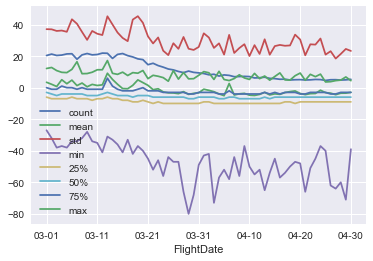

In [145]:
delays_per_day['count'] = delays_per_day['count'] / 1000
delays_per_day['max'] = delays_per_day['max'] / 150

delays_per_day.plot()

In [146]:
delays_per_day.plot

/home/dani/anaconda3/envs/master2021/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='FlightDate'>

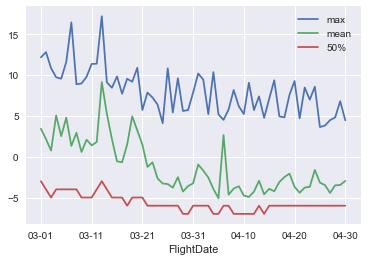

In [147]:
delays_per_day[['max', 'mean', '50%']].plot()

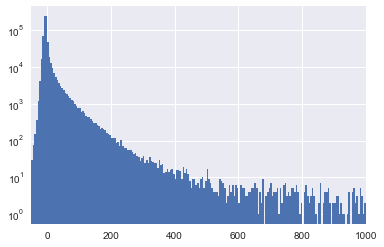

In [148]:
plt.hist(flights['DepDelay'].dropna(), bins= range(-50, 2500, 5));
plt.gca().set_xlim(-50, 1000)
plt.yscale('log')

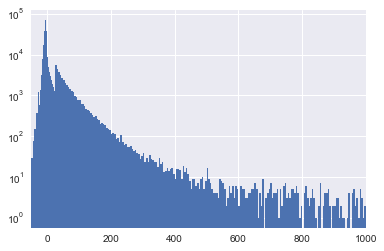

In [149]:
plt.hist(flights['DepDelay'].dropna(), bins=list(range(-50,-25, 5)) + list(range(-25, 25)) + list(range(25, 2500, 5)));
plt.gca().set_xlim(-50, 1000)
plt.yscale('log')

## Group-wise operations and transformations

### Apply: General split-apply-combine

In [150]:
flights.groupby('Tail_Number')[['Distance']]\
    .apply(lambda df: df['Distance'].max() - df['Distance'].min())

Tail_Number
215NV      733.0
216NV     1015.0
217NV     1148.0
218NV     1228.0
219NV      400.0
           ...  
N998JE    1437.0
N998NN    2113.0
N999DN     818.0
N999JB     125.0
N999JQ    1693.0
Length: 5561, dtype: float64

In [151]:
def sample_ten_percent(series):
    return series.sample(len(series) // 10)
    
    
stratified_sample = flights.groupby('Origin').apply(sample_ten_percent)
stratified_sample

FlightDate  DayOfWeek Reporting_Airline Tail_Number  \
Origin                                                               
ABE    73928   2020-04-28          2                OO      N8942A   
       552681  2020-03-24          2                OO      N702BR   
       507236  2020-03-18          3                OH      N575NN   
       17640   2020-03-17          2                9E      N678CA   
       18330   2020-03-27          5                9E      N390CA   
...                   ...        ...               ...         ...   
YUM    298871  2020-04-21          2                YV      N921FJ   
       524097  2020-03-18          3                OO      N778SK   
       524101  2020-03-22          7                OO      N764SK   
       520800  2020-03-12          4                OO      N732SK   
       454459  2020-03-30          1                YV         NaN   

               Flight_Number_Reporting_Airline Origin  \
Origin                                                  
ABE    73928                              4518    ABE   
       552681                             4321    ABE   
       507236                             5314    ABE   
       17640                              5172    ABE   
       18330                              5197    ABE   
...                                        ...    ...   
YUM    298871                             5845    YUM   
       524097                             3100    YUM   
       524101                             3100    YUM   
       520800                             2967    YUM   
       454459                             5851    YUM   

                               OriginCityName OriginStateName  \
Origin                                                          
ABE    73928   Allentown/Bethlehem/Easton, PA    Pennsylvania   
       552681  Allentown/Bethlehem/Easton, PA    Pennsylvania   
       507236  Allentown/Bethlehem/Easton, PA    Pennsylvania   
       17640   Allentown/Bethlehem/Easton, PA    Pennsylvania   
       18330   Allentown/Bethlehem/Easton, PA    Pennsylvania   
...                                       ...             ...   
YUM    298871                        Yuma, AZ         Arizona   
       524097                        Yuma, AZ         Arizona   
       524101                        Yuma, AZ         Arizona   
       520800                        Yuma, AZ         Arizona   
       454459                        Yuma, AZ         Arizona   

               OriginCityMarketID Dest   DestCityName   DestStateName  \
Origin                                                                  
ABE    73928                30135  DTW    Detroit, MI        Michigan   
       552681               30135  DTW    Detroit, MI        Michigan   
       507236               30135  CLT  Charlotte, NC  North Carolina   
       17640                30135  ATL    Atlanta, GA         Georgia   
       18330                30135  ATL    Atlanta, GA         Georgia   
...                           ...  ...            ...             ...   
YUM    298871               33785  PHX    Phoenix, AZ         Arizona   
       524097               33785  PHX    Phoenix, AZ         Arizona   
       524101               33785  PHX    Phoenix, AZ         Arizona   
       520800               33785  PHX    Phoenix, AZ         Arizona   
       454459               33785  PHX    Phoenix, AZ         Arizona   

               DestCityMarketID  DepTime  DepDelay  AirTime  Distance  
Origin                                                                 
ABE    73928              31295    917.0     -13.0     76.0     425.0  
       552681             31295    550.0       5.0     74.0     425.0  
       507236             31057   1243.0      68.0     97.0     481.0  
       17640              30397   1311.0       7.0    109.0     692.0  
       18330              30397      NaN       NaN      NaN     692.0  
...                         ...      ...       ...      ...   

#### Suppressing the group keys

In [154]:
stratified_sample = flights.groupby('Origin', group_keys=False).apply(sample_ten_percent)
stratified_sample

,FlightDate,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,OriginCityName,OriginStateName,OriginCityMarketID,Dest,DestCityName,DestStateName,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
14146,2020-04-17,5,MQ,N681AE,4052,ABE,"Allentown/Bethlehem/Easton, PA",Pennsylvania,30135,ORD,"Chicago, IL",Illinois,30977,1531.0,24.0,121.0,654.0
29436,2020-04-18,6,OH,N561NN,5231,ABE,"Allentown/Bethlehem/Easton, PA",Pennsylvania,30135,CLT,"Charlotte, NC",North Carolina,31057,1641.0,-12.0,89.0,481.0
306146,2020-03-02,1,MQ,N935AE,4052,ABE,"Allentown/Bethlehem/Easton, PA",Pennsylvania,30135,ORD,"Chicago, IL",Illinois,30977,1525.0,-7.0,105.0,654.0
273521,2020-03-26,4,G4,NaN,257,ABE,"Allentown/Bethlehem/Easton, PA",Pennsylvania,30135,SFB,"Sanford, FL",Florida,34761,NaN,NaN,NaN,882.0
268390,2020-03-06,5,G4,224NV,257,ABE,"Allentown/Bethlehem/Easton, PA",Pennsylvania,30135,SFB,"Sanford, FL",Florida,34761,1747.0,-3.0,122.0,882.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298832,2020-04-09,4,YV,NaN,5844,YUM,"Yuma, AZ",Arizona,33785,PHX,"Phoenix, AZ",Arizona,30466,NaN,NaN,NaN,160.0
522432,2020-03-18,3,OO,N726SK,3029,YUM,"Yuma, AZ",Arizona,33785,DFW,"Dallas/Fort Worth, TX",Texas,30194,533.0,33.0,123.0,1022.0
521678,2020-03-21,6,OO,N758EV,2994,YUM,"Yuma, AZ",Arizona,33785,PHX,"Phoenix, AZ",Arizona,30466,850.0,-3.0,34.0,160.0
524099,2020-03-20,5,OO,N758EV,3100,YUM,"Yuma, AZ",Arizona,33785,PHX,"Phoenix, AZ",Arizona,30466,1642.0,-11.0,34.0,160.0


### Quantile and bucket analysis

In [155]:
pd.cut(flights['Distance'], bins=(0, 100, 600, 10000))

0         (600, 10000]
1         (600, 10000]
2           (100, 600]
3           (100, 600]
4           (100, 600]
              ...     
313377    (600, 10000]
313378      (100, 600]
313379      (100, 600]
313380      (100, 600]
313381    (600, 10000]
Name: Distance, Length: 961611, dtype: category
Categories (3, interval[int64]): [(0, 100] < (100, 600] < (600, 10000]]

In [162]:
haul = pd.cut(flights['Distance'], bins=(0, 100, 600, 10000))

flights.groupby(haul)[['AirTime', 'DepDelay']]\
       .agg(['mean', 'median', 'std', 'count'])

AirTime                            DepDelay         \
                    mean median        std   count      mean median   
Distance                                                              
(0, 100]       23.501723   23.0   4.502007    9864 -0.241962   -6.0   
(100, 600]     59.579465   59.0  18.119129  324582 -0.191152   -5.0   
(600, 10000]  155.623871  137.0  64.716901  385804  0.700379   -5.0   

                                 
                    std   count  
Distance                         
(0, 100]      38.953161    9890  
(100, 600]    33.674868  325087  
(600, 10000]  33.084590  386679

#### Exercise: 

Show cities by descending number of airports

In [163]:
flights.sample(5)

,FlightDate,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,OriginCityName,OriginStateName,OriginCityMarketID,Dest,DestCityName,DestStateName,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
368737,2020-03-13,5,WN,N903WN,2378,BWI,"Baltimore, MD",Maryland,30852,HOU,"Houston, TX",Texas,31453,1353.0,8.0,192.0,1246.0
6065,2020-04-25,6,MQ,NaN,3474,ORD,"Chicago, IL",Illinois,30977,CMI,"Champaign/Urbana, IL",Illinois,31067,NaN,NaN,NaN,135.0
379949,2020-03-28,6,WN,N217JC,5712,HOU,"Houston, TX",Texas,31453,AUS,"Austin, TX",Texas,30423,1900.0,-5.0,29.0,148.0
74555,2020-04-30,4,OO,N281SY,3577,GEG,"Spokane, WA",Washington,31884,SEA,"Seattle, WA",Washington,30559,911.0,-4.0,42.0,224.0
70458,2020-03-08,7,AA,N960NN,2835,BUR,"Burbank, CA",California,32575,DFW,"Dallas/Fort Worth, TX",Texas,30194,1115.0,13.0,154.0,1231.0


In [170]:
flights.groupby('OriginCityName')['Origin'].nunique().sort_values(ascending=False).head(10)

OriginCityName
Washington, DC     2
Chicago, IL        2
Houston, TX        2
Mobile, AL         2
Phoenix, AZ        2
New York, NY       2
Columbus, OH       2
Garden City, KS    1
Fort Myers, FL     1
Fort Smith, AR     1
Name: Origin, dtype: int64

In [171]:
flights.groupby('OriginCityName')['Origin'].nunique()

OriginCityName
Aberdeen, SD       1
Abilene, TX        1
Adak Island, AK    1
Aguadilla, PR      1
Akron, OH          1
                  ..
Wilmington, NC     1
Worcester, MA      1
Wrangell, AK       1
Yakutat, AK        1
Yuma, AZ           1
Name: Origin, Length: 346, dtype: int64

In [174]:
flights.groupby('OriginCityName').nunique()

,FlightDate,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,OriginStateName,OriginCityMarketID,Dest,DestCityName,DestStateName,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
OriginCityName,,,,,,,,,,,,,,,,
"Aberdeen, SD",61,7,1,55,2,1,1,1,1,1,1,1,55,28,16,1
"Abilene, TX",61,7,1,68,9,1,1,1,1,1,1,1,127,41,19,1
"Adak Island, AK",17,2,1,9,1,1,1,1,1,1,1,1,13,14,14,1
"Aguadilla, PR",36,7,3,115,9,1,1,1,4,4,3,3,109,59,66,4
"Akron, OH",61,7,8,267,26,1,1,1,11,11,9,10,252,83,103,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Wilmington, NC",61,7,7,315,49,1,1,1,6,6,6,6,305,74,90,6
"Worcester, MA",59,7,2,85,4,1,1,1,4,4,3,4,83,41,68,4
"Wrangell, AK",61,7,1,11,2,1,1,1,2,2,1,2,72,51,23,2


In [178]:
flights[['OriginCityName', 'Origin']].drop_duplicates().groupby('OriginCityName').count().sort_values(by='Origin', ascending=False)

,Origin
OriginCityName,
"New York, NY",2
"Chicago, IL",2
"Mobile, AL",2
"Phoenix, AZ",2
"Columbus, OH",2
...,...
"Gainesville, FL",1
"Fresno, CA",1
"Fort Wayne, IN",1


In [180]:
flights.groupby(['OriginCityName', 'Origin']).count().groupby('OriginCityName').count()

,FlightDate,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginStateName,OriginCityMarketID,Dest,DestCityName,DestStateName,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
OriginCityName,,,,,,,,,,,,,,,
"Aberdeen, SD",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"Abilene, TX",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"Adak Island, AK",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"Aguadilla, PR",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"Akron, OH",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Wilmington, NC",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"Worcester, MA",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"Wrangell, AK",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


#### Exercise

The list above doesn't correspond to our intuitive expectation, probably. That is because airports serving the same general area may be located within several different city limits. This is encapsulated by the "market" concept in commercial aviation.

Find the 10 markets with the most airports, and which airports are included in them.

Hint: there is an aggregation that we haven't used yet that can come in really handy. Search for it in the [list of functions in groupby](https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html)

In [183]:
flights[flights['OriginCityName'] == 'New York, NY'].sample(5)

,FlightDate,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,OriginCityName,OriginStateName,OriginCityMarketID,Dest,DestCityName,DestStateName,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
246515,2020-03-16,1,EV,N605UX,4226,LGA,"New York, NY",New York,31703,ORD,"Chicago, IL",Illinois,30977,1623.0,-7.0,126.0,733.0
142518,2020-03-11,3,B6,N972JT,1099,LGA,"New York, NY",New York,31703,MCO,"Orlando, FL",Florida,31454,556.0,-14.0,134.0,950.0
152382,2020-03-24,2,B6,N821JB,403,JFK,"New York, NY",New York,31703,SJU,"San Juan, PR",Puerto Rico,34819,904.0,-12.0,191.0,1598.0
295780,2020-03-24,2,MQ,NaN,3653,JFK,"New York, NY",New York,31703,PIT,"Pittsburgh, PA",Pennsylvania,30198,NaN,NaN,NaN,340.0
148429,2020-03-18,3,B6,N599JB,1783,JFK,"New York, NY",New York,31703,MCO,"Orlando, FL",Florida,31454,1424.0,-5.0,130.0,944.0


In [185]:
flights.groupby('OriginCityMarketID')['Origin'].nunique().sort_values(ascending=False)

OriginCityMarketID
31703    6
32575    5
30852    3
32457    3
30721    3
        ..
33277    1
33290    1
33304    1
33316    1
30070    1
Name: Origin, Length: 328, dtype: int64

In [189]:
%%time

flights.groupby('OriginCityMarketID')['Origin']\
       .agg(['nunique', 'unique'])\
       .sort_values(by='nunique', ascending=False)\
       .head(10) 

CPU times: user 365 ms, sys: 0 ns, total: 365 ms
Wall time: 363 ms


,nunique,unique
OriginCityMarketID,,
31703,6,"[JFK, LGA, HPN, EWR, SWF, ISP]"
32575,5,"[LAX, ONT, SNA, BUR, LGB]"
32457,3,"[SFO, SJC, OAK]"
30852,3,"[DCA, IAD, BWI]"
30721,3,"[PVD, BOS, MHT]"
30977,2,"[ORD, MDW]"
30194,2,"[DFW, DAL]"
31453,2,"[IAH, HOU]"
32467,2,"[MIA, FLL]"


## Pivot tables and Cross-tabulation

In [190]:
flights.pivot_table(index='Origin', columns='Dest', values='AirTime')

Dest,ABE,ABI,ABQ,ABR,ABY,ACT,ACV,ACY,ADK,ADQ,AEX,AGS,ALB,ALO,AMA,ANC,APN,ASE,ATL,ATW,ATY,AUS,AVL,AVP,AZA,AZO,BDL,BET,BFF,BFL,BFM,BGM,BGR,BHM,BIL,BIS,BJI,BLI,BLV,BMI,BNA,BOI,BOS,BPT,BQK,BQN,BRD,BRO,BRW,BTM,BTR,BTV,BUF,BUR,BWI,BZN,CAE,CAK,CDC,CDV,CGI,CHA,CHO,CHS,CID,CIU,CKB,CLE,CLL,CLT,CMH,CMI,CMX,CNY,COD,COS,COU,CPR,CRP,CRW,CSG,CVG,CWA,CYS,DAB,DAL,DAY,DBQ,DCA,DDC,DEC,DEN,DFW,DHN,DIK,DLH,DRO,DRT,DSM,DTW,DVL,EAR,EAU,ECP,EGE,EKO,ELM,ELP,ERI,ESC,EUG,EVV,EWN,EWR,EYW,FAI,FAR,FAT,FAY,FCA,FLG,FLL,FNT,FSD,FSM,FWA,GCC,GCK,GEG,GFK,GGG,GJT,GNV,GPT,GRB,GRI,GRK,GRR,GSO,GSP,GTF,GTR,GUC,GUM,HDN,HGR,HHH,HIB,HLN,HNL,HOB,HOU,HPN,HRL,HSV,HTS,HVN,HYS,IAD,IAG,IAH,ICT,IDA,ILM,IMT,IND,INL,ISP,ITH,ITO,JAC,JAN,JAX,JFK,JLN,JMS,JNU,KOA,KTN,LAN,LAR,LAS,LAW,LAX,LBB,LBE,LBF,LBL,LCH,LCK,LEX,LFT,LGA,LGB,LIH,LIT,LNK,LRD,LSE,LWB,LWS,LYH,MAF,MBS,MCI,MCO,MDT,MDW,MEI,MEM,MFE,MFR,MGM,MHK,MHT,MIA,MKE,MKG,MLB,MLI,MLU,MMH,MOB,MOT,MQT,MRY,MSN,MSO,MSP,MSY,MTJ,MYR,OAJ,OAK,OGD,OGG,OGS,OKC,OMA,OME,ONT,ORD,ORF,ORH,OTH,OTZ,OWB,PAE,PAH,PBG,PBI,PDX,PGD,PHF,PHL,PHX,PIA,PIB,PIE,PIH,PIR,PIT,PLN,PNS,PPG,PRC,PSC,PSE,PSG,PSM,PSP,PUB,PVD,PVU,PWM,RAP,RDD,RDM,RDU,RFD,RHI,RIC,RIW,RKS,RNO,ROA,ROC,ROW,RST,RSW,SAF,SAN,SAT,SAV,SBA,SBN,SBP,SCC,SCE,SCK,SDF,SEA,SFB,SFO,SGF,SGU,SHD,SHR,SHV,SIT,SJC,SJT,SJU,SLC,SLN,SMF,SMX,SNA,SPI,SPN,SPS,SRQ,STC,STL,STS,STT,STX,SUN,SUX,SWF,SWO,SYR,TLH,TOL,TPA,TRI,TTN,TUL,TUS,TVC,TWF,TXK,TYR,TYS,USA,VEL,VLD,VPS,WRG,XNA,XWA,YAK,YUM
Origin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ABE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.163934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.436975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.773913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.064516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134.947368,NaN,NaN,NaN,NaN,NaN,136.5625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.058824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.142857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.286792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [192]:
flights.columns

Index(['FlightDate', 'DayOfWeek', 'Reporting_Airline', 'Tail_Number',
       'Flight_Number_Reporting_Airline', 'Origin', 'OriginCityName',
       'OriginStateName', 'OriginCityMarketID', 'Dest', 'DestCityName',
       'DestStateName', 'DestCityMarketID', 'DepTime', 'DepDelay', 'AirTime',
       'Distance'],
      dtype='object')

In [193]:
flights.pivot_table(index='Reporting_Airline', columns='DayOfWeek', values='DepDelay')

DayOfWeek,1,2,3,4,5,6,7
Reporting_Airline,,,,,,,
9E,-1.707888,-2.419213,-1.649101,-1.063947,5.429478,-0.854762,-2.967217
AA,-0.224525,-0.559173,2.343172,1.606453,3.250790,0.469832,0.539833
AS,-3.028130,-3.333931,-3.049471,-3.571046,-0.464286,-0.625544,0.015668
B6,-0.271827,-2.905212,-1.211667,-3.060995,1.330606,1.251513,1.907815
DL,0.398689,-0.788563,2.626048,2.006141,2.021452,0.822409,0.357781
EV,-3.330180,-4.691929,-2.401846,-4.482199,-1.713975,-3.783871,-3.053221
F9,0.310252,-0.458415,-0.026334,0.439729,4.596370,1.902635,0.082505
G4,5.367169,-1.790609,0.089943,9.346806,7.529054,4.461660,4.709606
HA,-0.941385,8.142466,-1.621141,-2.818182,-2.800826,-2.882759,-3.590426


In [196]:
flights.pivot_table(index='Reporting_Airline', 
                    columns='DayOfWeek', 
                    values=['DepDelay', 'Distance'], 
                    aggfunc=['mean', 'std'])

mean                                                    \
                   DepDelay                                                     
DayOfWeek                 1         2         3         4         5         6   
Reporting_Airline                                                               
9E                -1.707888 -2.419213 -1.649101 -1.063947  5.429478 -0.854762   
AA                -0.224525 -0.559173  2.343172  1.606453  3.250790  0.469832   
AS                -3.028130 -3.333931 -3.049471 -3.571046 -0.464286 -0.625544   
B6                -0.271827 -2.905212 -1.211667 -3.060995  1.330606  1.251513   
DL                 0.398689 -0.788563  2.626048  2.006141  2.021452  0.822409   
EV                -3.330180 -4.691929 -2.401846 -4.482199 -1.713975 -3.783871   
F9                 0.310252 -0.458415 -0.026334  0.439729  4.596370  1.902635   
G4                 5.367169 -1.790609  0.089943  9.346806  7.529054  4.461660   
HA                -0.941385  8.142466 -1.621141 -2.818182 -2.800826 -2.882759   
MQ                -2.696903 -3.062567 -1.486822 -0.437968  0.932697 -0.627907   
NK                 4.820390  3.690234  4.221722  3.396692  5.467430  4.041904   
OH                 4.610658  0.932104  2.290122  1.276879  3.315338 -0.138889   
OO                 0.334075 -1.242576  0.626029  1.556310  3.820079  0.794643   
UA                -1.800590 -0.736026 -1.412125 -0.300822  5.105694  1.248512   
WN                -1.234474 -1.054350 -1.022444 -0.083004  0.196322 -0.215981   
YV                 2.203698 -0.400274  5.694783  3.696464  3.986076  2.892055   
YX                -3.736144 -4.222489 -3.384430 -3.622343  1.810401 -2.532226   

                                                                    \
                                Distance                             
DayOfWeek                 7            1            2            3   
Reporting_Airline                                                    
9E                -2.967217   429.271957   425.361995   428.211143   
AA                 0.539833   958.393677   954.218710   954.886730   
AS                 0.015668  1313.673523  1304.924845  1295.494629   
B6                 1.907815  1132.797292  1113.184390  1121.289556   
DL                 0.357781   889.672091   880.263879   885.188367   
EV                -3.053221   484.047370   481.182997   480.902256   
F9                 0.082505  1001.456661  1023.835057  1049.034321   
G4                 4.709606   895.243408   912.828377   950.804914   
HA                -3.590426   658.017309   685.066440   704.462375   
MQ                -2.359440   453.988092   456.714165   460.439489   
NK                 3.947994  1006.572403  1008.412366  1007.522714   
OH                 0.850226   415.955569   414.870480   412.824047   
OO                 0.866443   476.143091   480.337764   473.167555   
UA                 0.397874  1163.296067  1157.625316  1143.192002   
WN                -0.459891   742.481095   748.833797   749.012174   
YV                 2.640602   596.683458   596.690950   592.946424   
YX                -2.537602   591.358796   587.136800   582.613420   

                                                                       \
                                                                        
DayOfWeek                    4            5            6            7   
Reporting_Airline                                                       
9E                  423.819877   424.197049   416.531407   423.036134   
AA                  961.823042   969.162312  1022.252658   978.474551   
AS                 1293.312150  1307.154903  1354.761248  1327.160360   
B6                 1142.761408  1128.382428  1125.651369  1148.703433   
DL                  888.676761   892.508425   897.881251   892.147753   
EV                  484.575500   489.673580   491.426929   491.303611   
F9                  995.654918  1013.782609  1016.407930   983.089634   
G4                  880.019329   881.253795   9

In [198]:
%%time
flights.pivot_table(index=['Reporting_Airline', 'Flight_Number_Reporting_Airline'], 
                    columns='DayOfWeek', 
                    values=['DepDelay', 'Distance'], 
                    aggfunc=['mean', 'std'])

CPU times: user 771 ms, sys: 44.2 ms, total: 815 ms
Wall time: 813 ms


mean             \
                                                    DepDelay              
DayOfWeek                                                  1          2   
Reporting_Airline Flight_Number_Reporting_Airline                         
9E                4628                                   NaN        NaN   
                  4629                             -7.500000   0.500000   
                  4633                                   NaN        NaN   
                  4634                             -3.500000  -5.625000   
                  4635                             -6.500000 -10.000000   
...                                                      ...        ...   
YX                6139                             -5.666667  -4.833333   
                  6140                             -3.000000  16.000000   
                  6141                            -14.000000 -16.000000   
                  6142                             27.428571  -8.625000   
                  6143                             -9.000000  -9.000000   

                                                                         \
                                                                          
DayOfWeek                                                  3          4   
Reporting_Airline Flight_Number_Reporting_Airline                         
9E                4628                                   NaN        NaN   
                  4629                            -11.000000  -2.500000   
                  4633                                   NaN        NaN   
                  4634                             -6.000000  16.200000   
                  4635                             -8.000000 -22.000000   
...                                                      ...        ...   
YX                6139                             -6.833333  -8.250000   
                  6140                            -10.500000 -11.333333   
                  6141                            -10.500000 -10.333333   
                  6142                             -5.833333  -5.166667   
                  6143                            -11.000000  -7.500000   

                                                                            \
                                                                             
DayOfWeek                                               5     6          7   
Reporting_Airline Flight_Number_Reporting_Airline                            
9E                4628                                NaN   NaN        NaN   
                  4629                             -4.500 -10.0 -16.500000   
                  4633                                NaN   NaN        NaN   
                  4634                             -8.250  -6.5  -4.625000   
                  4635                             -7.500 -14.0  -9.500000   
...                                                   ...   ...        ...   
YX                6139                             -2.400  -7.0  11.250000   
                  6140                             31.000   NaN  -6.400000   
                  6141                             -0.500  -8.5  45.000000   
                  6142                             -0.375   7.8  -6.666667   
                  6143                             -5.500  -6.0        NaN   

                                                                           \
                                                     Distance               
DayOfWeek                                                   1           2   
Reporting_Airline Flight_Number_Reporting_Airline                           
9E                4628                             610.000000  610.000000   
                  4629                             500.000000  500.000000   
                  4633                                    NaN         NaN   
                  4634                             645.000000  645.000000   
                 

/home/dani/anaconda3/envs/master2021/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='FlightDate'>

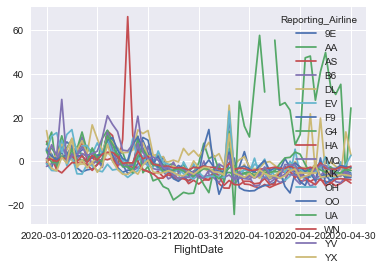

In [203]:
delays = flights.pivot_table(columns='Reporting_Airline', values='DepDelay', index=['FlightDate'])
delays.plot()

In [207]:
(delays > 20).mean(axis=0)

Reporting_Airline
9E    0.016393
AA    0.000000
AS    0.000000
B6    0.000000
DL    0.000000
EV    0.000000
F9    0.000000
G4    0.278689
HA    0.016393
MQ    0.000000
NK    0.032787
OH    0.016393
OO    0.000000
UA    0.000000
WN    0.000000
YV    0.049180
YX    0.000000
dtype: float64

#### Exercise:

How do the delays stack over the course of the day? We are going to look at it by examining the distribution of delays for each hour of the day. 

* Calculate minimum, 25th percentile, median, average, 75th percentile, and maximum delay for each hour of the day.

#### Exercise

We are also interested in examining how the home base influences delays. Calculate the delay distribution (minimum, 25th percentile, median, average, 75th percentile, and maximum) for every airport. Then show the values for the 10 airports with the most flights.

#### Take home project

If we wanted to do some machine learning, we would need to create as many informative features as we thought could be useful. This is called Feature Engineering.

Discrete data would most often be transformed by [one-hot encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f), which is [very easy to do in pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html).

![One Hot Encoding](https://hackernoon.com/photos/4HK5qyMbWfetPhAavzyTZrEb90N2-3o23tie)

With high cardinality discrete data such as airports or, especially, tail numbers, we would be left with many variables, most of which would not be very informative. There are [several options](https://www.datacamp.com/community/tutorials/encoding-methodologies) to deal with this. The most sophisticated is probably vector encoding, but we can do with a very simple approach: [target encoding](https://maxhalford.github.io/blog/target-encoding-done-the-right-way/).

This means that we substitute each value of the discrete variable by the average or median value of the target variable for that value of the independent discrete variable. However! if we want to use this in machine learning for predictions, we would need to use only the previous values.

Target encode the variable 'Origin' and the 'Tail_Number' variable, using for each cell only the values that were available the previous day. In other words: create a `median_delay_origin` variable that contains, for each record, the median delay at that airport _up to the previous day_. Create another one, `median_delay_plane`, with Tail_Number.